### 목표 : 생선 품종 분류 모델
  - 데이터 : 2가지 품종의 생선 데이터
  - 피처 : Weight, Length
  - 타겟 : Species
  - 유형 : 지도학습 / 분류

# 새로운 결과 추출을 위해 복사한 파일
### 목표 :

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # 기계학습 관련 모듈

In [17]:
# 데이터 불러오기
data_file = pd.read_csv('../../DATA/fish.csv', encoding='utf-8')
data_file

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [18]:
# 2개의 피처만 선택
fish_df = pd.DataFrame(data_file, columns=['Species', 'Weight', 'Length'])
# fish_df = pd.read_csv('../DATA/fish.csv', usecols=['Species', 'Weight', 'Length'])
fish_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [19]:
# Bream, Smelt 품종만 추출
mask = fish_df.Species.isin(['Bream', 'Smelt'])
two_species_df = fish_df[mask]

# index 정리
two_species_df.reset_index(drop=True, inplace=True)
two_species_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


#### 2) 데이터 전처리

In [20]:
# 타겟 bool 처리
# two_species_df['Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy()
# - 오류 해결 방법 :
# 1) slice copy warning    : .loc[:, ]
# 2) type -> object        : .copy(deep=True)
two_species_df.loc[:, 'Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy(deep=True)
two_species_df.dtypes

Species     object
Weight     float64
Length     float64
dtype: object

In [21]:
# Species -> int로 변환
two_species_df['Species'] = two_species_df['Species'].astype(int)
two_species_df.dtypes

C:\Users\wjs31\AppData\Local\Temp\ipykernel_34388\3135184734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_species_df['Species'] = two_species_df['Species'].astype(int)


Species      int32
Weight     float64
Length     float64
dtype: object

### (새로 입력된 구간) 

### 2) 데이터 전처리
- 정제 : 결측치, 중복값, 이상치 처리
- 정규화 : 피쳐 스케일링

In [22]:
# 표준 정규분포 => 평균 0, 표준편차 1
# : Weight처럼 값이 너무 커 타 데이터와 비교하기 어려운 경우
#   정규화 해버리기
two_species_df.describe()   # Weight = mean : 444.5, std : 328.14

,Species,Weight,Length
count,49.000000,49.000000,49.000000
mean,0.285714,444.500000,27.055102
std,0.456435,328.143233,10.242804
min,0.000000,6.700000,9.800000
25%,0.000000,19.700000,14.300000
50%,0.000000,500.000000,31.000000
75%,1.000000,700.000000,34.500000
max,1.000000,1000.000000,41.000000


In [23]:
# Weight 정규화
ret1 = two_species_df.Weight - two_species_df.Weight.mean()
ret1 = ret1 / two_species_df.Weight.std()
two_species_df.loc[:, 'Weight'] = ret1
two_species_df

# 학습용 데이터만으로 평균과 표준편차를 구해야한다

,Species,Weight,Length
0,0,-0.617109,25.4
1,0,-0.470831,26.3
2,0,-0.318458,26.5
3,0,-0.248367,29.0
4,0,-0.044188,29.0
5,0,0.016761,29.7
6,0,0.169133,29.7
7,0,-0.166086,30.0
8,0,0.016761,30.0
9,0,0.169133,30.7


In [24]:
# 이걸 다 해주는 모듈 존재!

### 3) 피처와 타겟 분리

In [25]:
# 피처 데이터 추출 
# : 피처와 타겟을 나눈 후 연산
#   연산 후 나눠도 상관 없음
feature_df = two_species_df[two_species_df.columns[1:]]
feature_df.head(2)

,Weight,Length
0,-0.617109,25.4
1,-0.470831,26.3


In [26]:
# 타겟 데이터도 추출
target_SR = two_species_df['Species']
target_SR.head(2)

0    0
1    0
Name: Species, dtype: int32

### 3-1) 학습/테스트 데이터셋 분리

In [27]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_df, target_SR, test_size=0.2, stratify=target_SR)

In [29]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 --->', X_train.shape, y_train.shape)
print(y_train.value_counts()/y_train.shape[0])

print(f'테스트 데이터셋 --->', X_test.shape, y_test.shape)
print(y_test.value_counts()/y_test.shape[0])

학습용 데이터셋 ---> (39, 2) (39,)
Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트 데이터셋 ---> (10, 2) (10,)
Species
0    0.7
1    0.3
Name: count, dtype: float64


### 3-2) 피처 데이터의 스케일링
- 피처들의 값의 범위가 다른 것을 통일
- scikit-learn의 preprocessing 사용

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# 표준 정규분포 스케일링 : 평균 0, 편차 1
# 1) 스케일러 인스턴스 생성
# 2) 데이터에 대한 평균, 표준편차 계산 진행 : fit()
# 3) 데이터 스케일링                        : transform()

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)                     

StandardScaler()

In [34]:
scaler.mean_    # .mean_ 인 이유 : 

array([ 0.05016571, 27.27435897])

In [35]:
X_train

,Weight,Length
24,0.778623,35.0
33,1.616672,41.0
27,0.821288,36.0
23,0.717674,35.0
0,-0.617109,25.4
30,1.449062,38.5
16,0.778623,33.0
40,-1.328079,11.3
41,-1.324117,11.8
21,0.732912,34.0


In [36]:
# .transform : 스케일링
#              정규분포로 바꿈
scaler.transform(X_train)

array([[ 0.71100187,  0.74332124],
       [ 1.52896862,  1.32061022],
       [ 0.75264381,  0.83953607],
       [ 0.65151338,  0.74332124],
       [-0.65128458, -0.18034113],
       [ 1.36537527,  1.08007315],
       [ 0.71100187,  0.55089158],
       [-1.34521782, -1.53697024],
       [-1.34135107, -1.48886283],
       [ 0.6663855 ,  0.64710641],
       [ 1.46948013,  1.08007315],
       [-0.21106974,  0.26224709],
       [-1.34878713, -1.61394211],
       [ 1.45460801,  1.32061022],
       [ 0.11611696,  0.40656933],
       [ 0.04175634,  0.35846192],
       [ 1.38024739,  1.17628798],
       [ 0.11611696,  0.32959747],
       [-1.31190427, -1.18097537],
       [-1.33480734, -1.45037689],
       [ 0.4730479 ,  0.69521383],
       [-1.34194596, -1.54659172],
       [-1.35027435, -1.60432062],
       [-1.34194596, -1.46961986],
       [ 0.11611696,  0.23338264],
       [-0.29137921,  0.16603226],
       [-1.35116667, -1.68129249],
       [ 0.3391988 ,  0.64710641],
       [-0.09209276,

In [37]:
# 학습용 데이터 피처 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [38]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

In [39]:
# 모듈 로딩
# import matplotlib.pyplot as plt

In [40]:
# 스케일된 데이터 시각화 -> scaled_X_train
scaled_X_train.shape, scaled_X_train.ndim

((39, 2), 2)

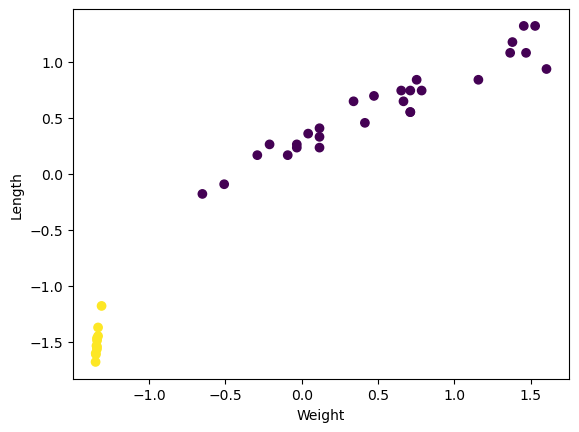

In [41]:
## Scale된 데이터 시각화 ==> x_train
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

### 4) 학습 진행 : 다양한 방법 정리

In [42]:
# 방법 1 : KNN 알고리즘
fish_model = KNeighborsClassifier()

# 학습
fish_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [43]:
# 방법 2 : SVC
from sklearn.svm import SVC

# 학습
fish_model_svc = SVC()
fish_model_svc.fit(scaled_X_train, y_train)

SVC()

In [44]:
# 방법 3 : LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train, y_train)

LogisticRegression()

### 5) 테스트 진행

In [45]:
print('KNN :', fish_model.score(scaled_X_test, y_test))
print('SVC :', fish_model_svc.score(scaled_X_test, y_test))
print('LogisticRegression :', log_reg.score(scaled_X_test, y_test))

KNN : 1.0
SVC : 1.0
LogisticRegression : 1.0
